# Brain Tumor Detection Assignment

# Step 1: Importing preprocessed data from Google Drive

In [1]:
import tensorflow as tf
from tensorflow.keras import layers

# Replace Google Drive paths with local paths
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "F:/Session 8/tumor_dataset/train",  # Local path to your training data
    image_size=(512, 512),
    batch_size=32,
    color_mode="grayscale"
)

val_data = tf.keras.preprocessing.image_dataset_from_directory(
    "F:/Session 8/tumor_dataset/train",  # Local path to your validation data
    image_size=(512, 512),
    batch_size=32,
    color_mode="grayscale"
)

# Normalization
norm = layers.Rescaling(1/255)
train_ds = train_data.map(lambda x, y: (norm(x), y))
val_ds = val_data.map(lambda x, y: (norm(x), y))


Found 2451 files belonging to 3 classes.
Found 2451 files belonging to 3 classes.



# Step 2: Creating a CNN model for fitting the data

In [8]:
# Define the CNN model
model = tf.keras.Sequential([
    layers.InputLayer(input_shape=(512, 512, 1)),

    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Summary of the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 512, 512, 32)      320       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 256, 256, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 256, 256, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 128, 128, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 128, 128, 128)     73856     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 64, 64, 128)      

# Step 3: Fitting the data

In [10]:
history = model.fit(
    train_ds,             
    validation_data=val_ds, 
    epochs=10,             
    verbose=1          
)

Epoch 1/10
77/77 [==============================] - 201s 3s/step - loss: 0.9327 - accuracy: 0.5524 - val_loss: 0.6784 - val_accuracy: 0.6948
Epoch 2/10
77/77 [==============================] - 208s 3s/step - loss: 0.6848 - accuracy: 0.6928 - val_loss: 0.4796 - val_accuracy: 0.7462
Epoch 3/10
77/77 [==============================] - 206s 3s/step - loss: 0.5668 - accuracy: 0.7381 - val_loss: 0.3899 - val_accuracy: 0.8290
Epoch 4/10
77/77 [==============================] - 197s 3s/step - loss: 0.4895 - accuracy: 0.7703 - val_loss: 0.3638 - val_accuracy: 0.8743
Epoch 5/10
77/77 [==============================] - 195s 3s/step - loss: 0.4066 - accuracy: 0.8103 - val_loss: 0.2643 - val_accuracy: 0.8911
Epoch 6/10
77/77 [==============================] - 193s 3s/step - loss: 0.3667 - accuracy: 0.8511 - val_loss: 0.2398 - val_accuracy: 0.9106
Epoch 7/10
77/77 [==============================] - 193s 3s/step - loss: 0.3036 - accuracy: 0.8760 - val_loss: 0.2076 - val_accuracy: 0.9270
Epoch 8/10
77

# Step 4: Visualization of the training-validation quality

<Axes: >

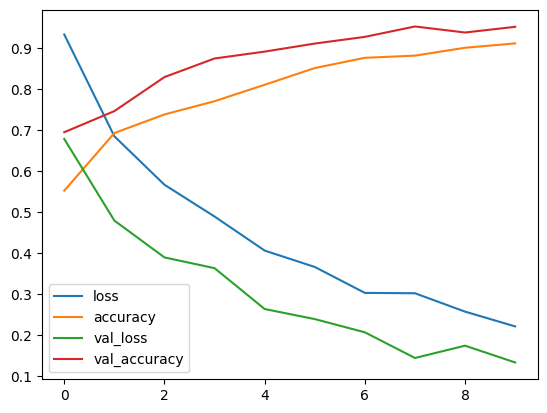

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.DataFrame(history.history)
df.plot()